In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('cluster_points.csv')

In [4]:
dataset

,X1,X2
0,1.171005,2.439819
1,2.747294,3.610370
2,1.979098,3.117327
3,3.277665,2.408429
4,2.547097,2.797807
...,...,...
145,5.071566,0.522343
146,5.478980,1.333662
147,6.037540,0.489984
148,4.730125,0.021236


In [5]:
X = np.array(dataset)

In [6]:
X

array([[ 1.17100499e+00,  2.43981896e+00],
       [ 2.74729361e+00,  3.61037027e+00],
       [ 1.97909841e+00,  3.11732738e+00],
       [ 3.27766490e+00,  2.40842861e+00],
       [ 2.54709738e+00,  2.79780735e+00],
       [ 1.78231880e+00,  4.09877685e+00],
       [ 2.82541635e+00,  3.81350964e+00],
       [ 3.30547881e+00,  3.02100384e+00],
       [ 2.68195297e+00,  2.68973324e+00],
       [ 2.32416635e+00,  2.86985695e+00],
       [ 2.09699596e+00,  3.59515703e+00],
       [ 1.18177932e+00,  5.09238728e+00],
       [ 9.93982619e-01,  1.78581139e+00],
       [ 3.15811087e+00,  3.79166269e+00],
       [ 2.62411982e+00,  3.62834551e+00],
       [ 1.98775323e+00,  2.10274563e+00],
       [ 2.07580456e+00,  2.32283829e+00],
       [ 2.97511973e+00,  2.85294262e+00],
       [ 1.17450280e+00,  2.67861416e+00],
       [ 2.41293145e+00,  2.43627545e+00],
       [ 1.17777960e+00,  3.24368721e+00],
       [ 2.24496657e+00,  2.49305682e+00],
       [ 1.52896169e+00,  3.23204994e+00],
       [ 5.

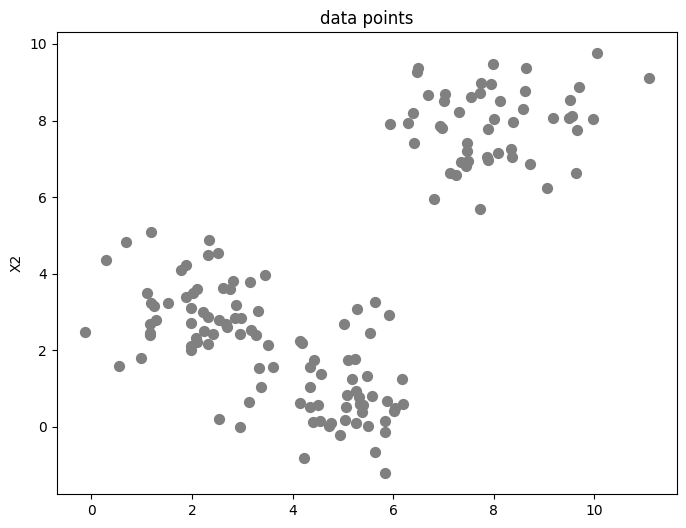

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],s=50,c='gray')
plt.title('data points')
plt.xlabel;('X1')
plt.ylabel('X2')
plt.show()

In [9]:
k=3
iter = 10

In [10]:
initial = X[np.random.choice(X.shape[0],k,replace=False)]

In [11]:
centroids = initial

In [12]:
def assign_cluster(X, centroids):
    clusters = []
    for x in X:
        distances = [np.linalg.norm(x - centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

In [13]:
def updateCentroid(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)   
    
 

In [14]:
def plotAssignment(X, clusters, centroids):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=50, alpha=0.7, label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.title(f'Cluster Assignment Step - Iteration {iteration + 1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

In [15]:
def plotNewCentroids(X, clusters, new_centroids):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=50, alpha=0.7, label=f'Cluster {i+1}')
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=200, c='blue', marker='X', label='New Centroids')
    plt.title(f'New Centroid Calculation Step - Iteration {iteration + 1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

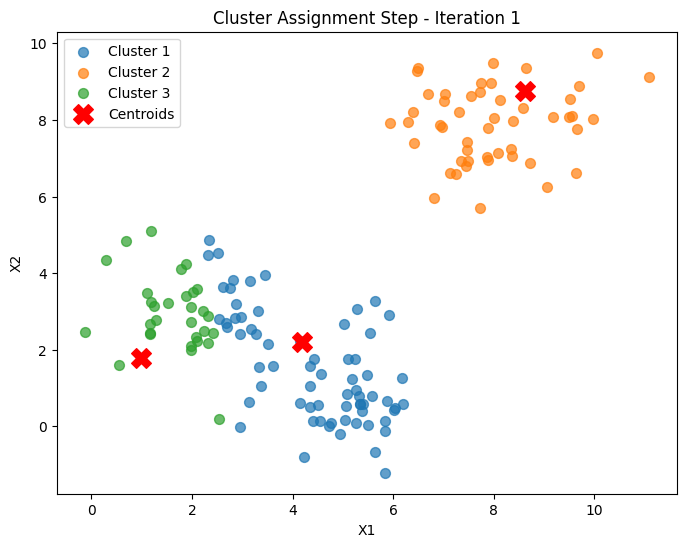

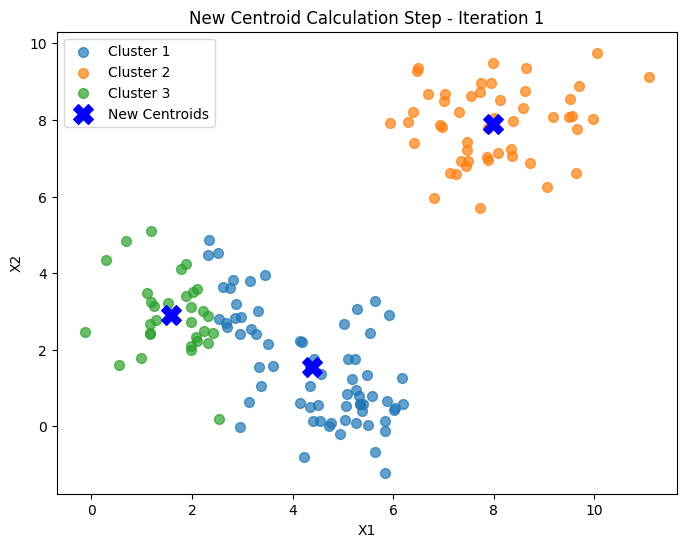

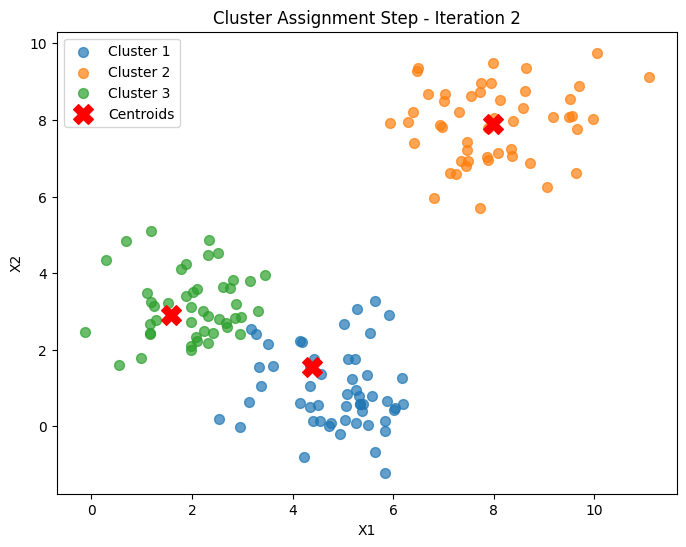

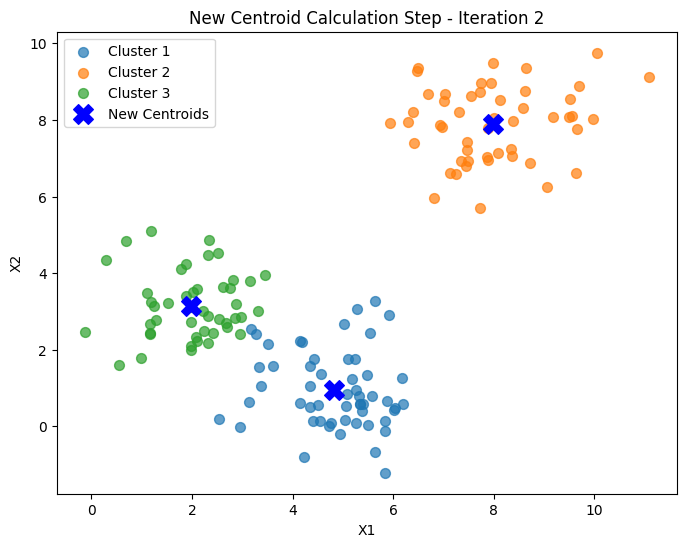

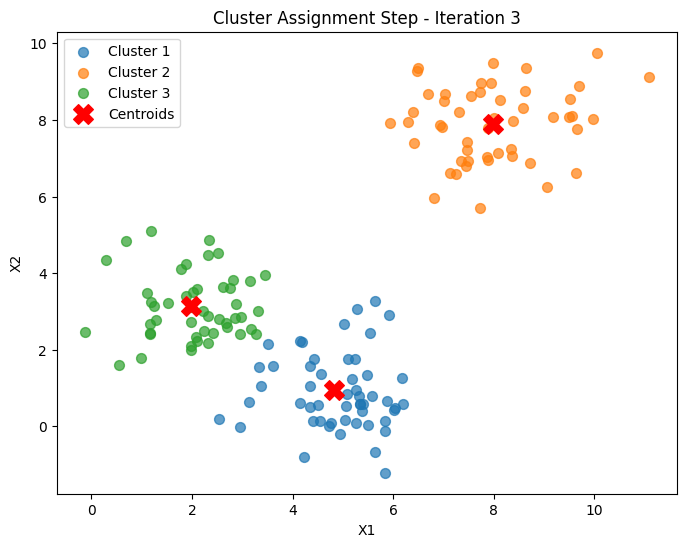

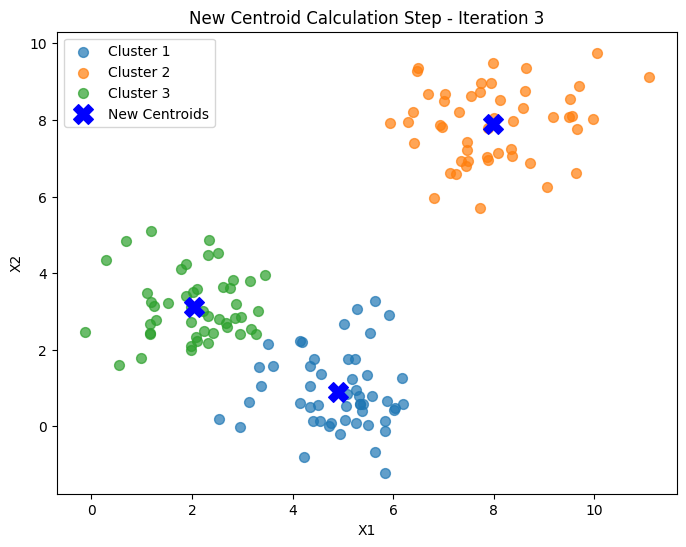

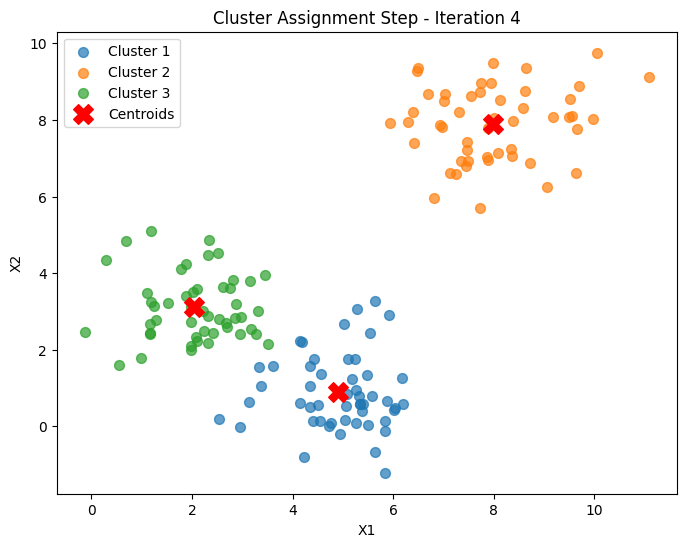

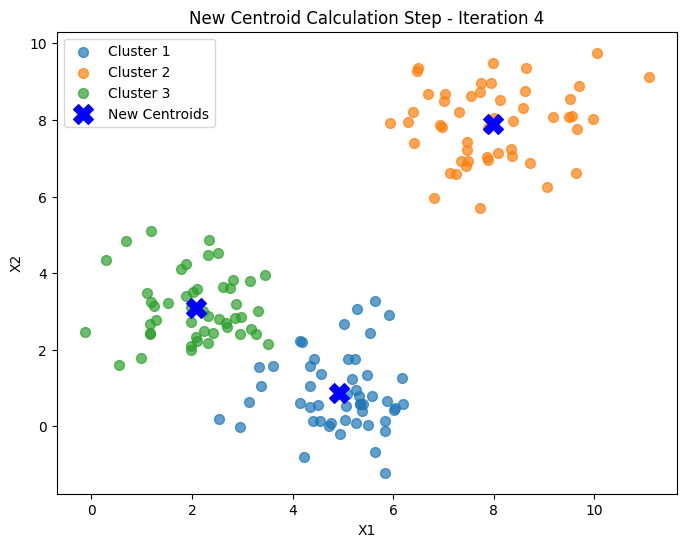

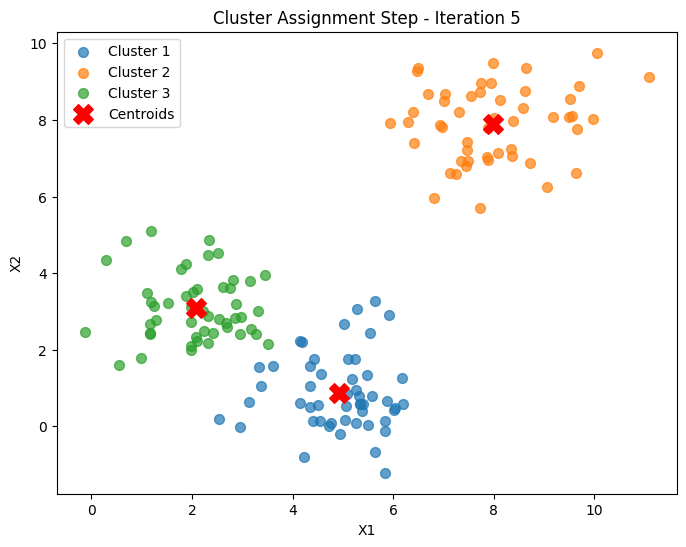

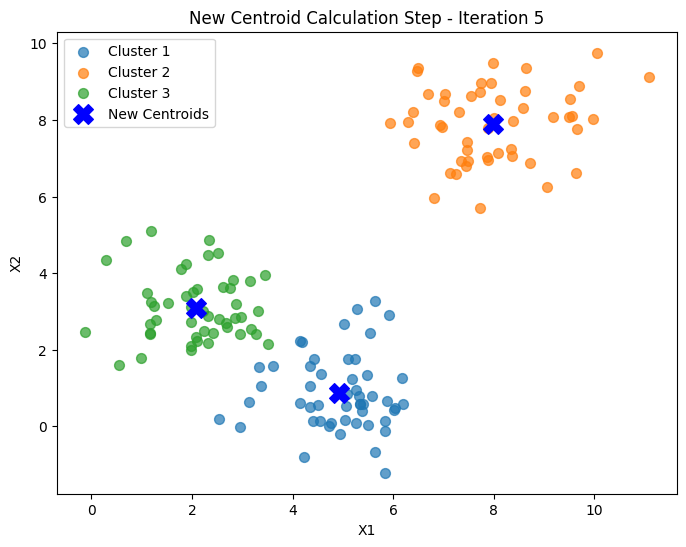

Converged after 5 iterations


In [16]:
for iteration in range(iter):
    clusters = assign_cluster(X, centroids)
    plotAssignment(X, clusters, centroids)
    new_centroids = updateCentroid(X, clusters, k)
    plotNewCentroids(X, clusters, new_centroids)

    if np.all(centroids == new_centroids):
        print(f"Converged after {iteration + 1} iterations")
        break

    centroids = new_centroids